For given DNA sequences:
Sequence X is obtained from FASTA file (x.fasta)
Sequence Y is obtained from FASTA file (y.fasta)

The sequences might be contain ambiguous letters. Use seq = seq.replace(“<letter>”, “”) function to
remove the unwanted letter from the sequence.

<small>The ambiguous letters can be any character so filter the sequence after reading it from fasta file is a must.<small>

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO

In [4]:
ReadX = SeqIO.read('Latsol/x.fasta','fasta')
SeqX = ReadX.seq
ReadY = SeqIO.read('Latsol/y.fasta','fasta')
SeqY = ReadY.seq

In [5]:
def clean_sequence(seq):
    for letters in "BDEFHIJKLMNOPQRUVWXYZ":
        seq = seq.replace(letters,"")
    return seq

In [6]:
print(len(SeqX))
print(len(SeqY))

1883
1050


In [7]:
SeqX = clean_sequence(SeqX)
SeqY = clean_sequence(SeqY)

# 1. Sequence Manipulation:
* Display the total length of Sequence X and Y

In [8]:
print(len(SeqX))
print(len(SeqY))

1865
1050


* Display which index the first time the codon (CGC) appears in Sequence X and Y.

In [11]:
print(SeqX.index("CGC"))
print(SeqY.index("CGC"))

51
39


In [12]:
print(SeqX.count("CGC"))
print(SeqY.count("CGC"))

31
24


## Create a new sequence using the following task below:
-
    - Take the first 10 nucleotides from Sequence X and the last 5 nucleotides from Sequence X.
    - o Take the first 20 nucleotides from Sequence Y and the last 3 nucleotides from Sequence Y.
    - Combine both of the string above and reverse it to a new sequence, Sequence Z.

In [15]:
Seq1 = SeqX[:10] + SeqY[-5:]
Seq2 = SeqX[:20] + SeqY[-3:]

SeqZ = Seq1+Seq2

SeqZ = SeqZ[::-1]
print(SeqZ)

CAGTTCAGGTCTAGGTTGTGGTACAGCTGGTTGTGGTA


# 2. Sequence Analysis & Plotting
* Display the nucleotides base (A and C) frequency for Sequence C with a chart using matplotlib
library. You are free to plot using bar or pie chart.

In [18]:
from collections import Counter
freqZ = Counter(SeqZ)
print(freqZ)

Counter({'G': 14, 'T': 13, 'A': 6, 'C': 5})


In [19]:
freqKeys = ['A','C']
freqVal = [freqZ[key]for key in freqKeys]

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Nucleotide count')

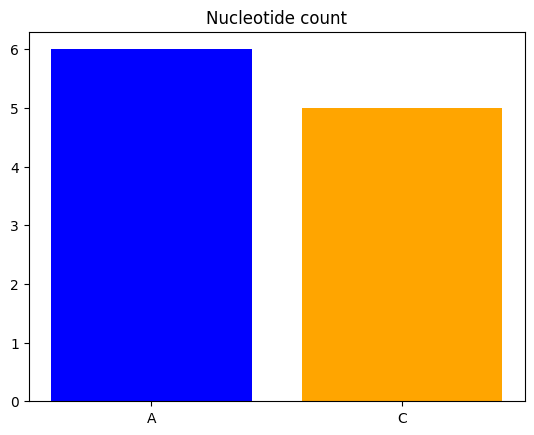

In [79]:
plt.bar(freqKeys,freqVal, color=['blue', 'orange'])
plt.title("Nucleotide count")

+ Display GC and AT content percentage for Sequence C.

In [40]:
from Bio.SeqUtils import GC123,gc_fraction
GCsZ = GC123(SeqZ)[0]
# GCsZ
ATsZ = 100 - GCsZ

print(GCsZ)
print(ATsZ)

50.0
50.0


+ Display melting temperature for Sequence C using Wallace method.

In [43]:
from Bio.SeqUtils import MeltingTemp as mt
print("%0.2f" % mt.Tm_Wallace(SeqZ))

114.00


+ Display molecular weight for Sequence C.

In [45]:
from Bio.SeqUtils import molecular_weight as mw
print("%0.2f" % mw(SeqZ))

11906.56


# 3. DNA and mRNA Protein Synthesis:
+ Transcribe and display the DNA sequence C into mRNA Sequence.

In [46]:
mRNAsZ = SeqZ.transcribe()
mRNAsZ

Seq('CAGUUCAGGUCUAGGUUGUGGUACAGCUGGUUGUGGUA')

+ Translate and display the mRNA sequence C into amino acids Sequence.

In [48]:
AminosZ = mRNAsZ.translate()
AminosZ

c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('QFRSRLWYSWLW')

# 4. Sequence Alginment & Similarities:
+ Perform local alignment pairwise between sequence A and sequence B and display the alignment
score.

In [49]:
from Bio import pairwise2

c:\Users\darre\AppData\Local\Programs\Python\Python310\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [57]:
from Bio.pairwise2 import format_alignment

In [62]:
Local = pairwise2.align.localxx(SeqX,SeqY)
print(format_alignment(*Local[0]))

6 GTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGCTCCCACGGCCGG-GACAC

In [60]:
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = "local"
alignment = aligner.align(SeqX, SeqY)
scores = alignment.score
print(scores)

873.0


In [64]:
# scores = Align.PairwiseAligner().align(SeqX, SeqY).score
# print(scores)

873.0


In [65]:
Global = pairwise2.align.globalxx(SeqX,SeqY)
print(format_alignment(*Global[0]))

ATGGTGTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGCTCCCACGGCCGG-GA

+ Find and display the Hamming and Levenshtein distance between Sequence A and B

In [75]:
def Hamming(seq):
    h = []
    for x,y in zip(SeqX,SeqY):
        if(x!=y):
            h.append((x,y))
    return len(h)    
    # print(h)

In [76]:
Hamming(SeqZ)

755

In [72]:
from Levenshtein import distance

print(distance(SeqX,SeqY))

1028
